In [10]:
import pandas as pd
ad=pd.read_csv("Advertising.csv", usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
# df.iloc[:,1:len(df)]
df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [16]:
df.isnull().values.any()

False

In [18]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


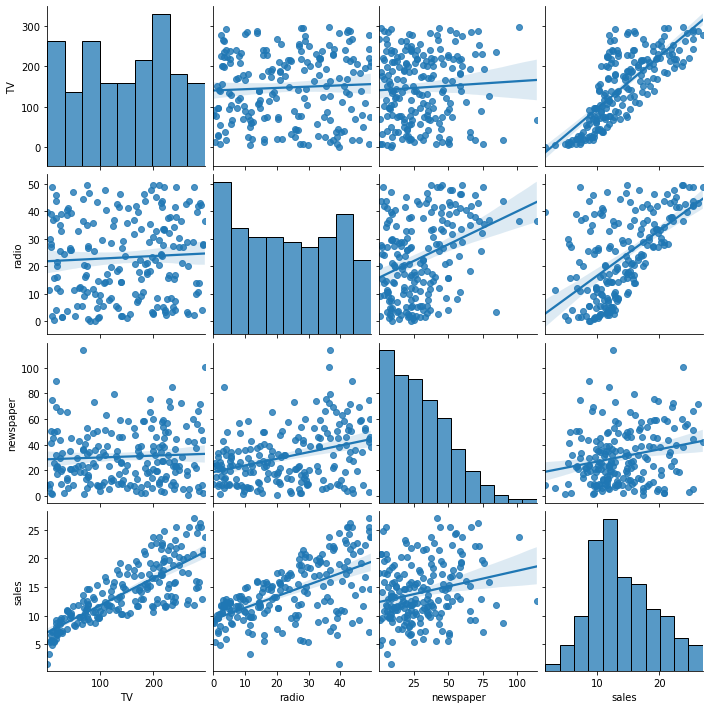

In [20]:
import seaborn as sns
sns.pairplot(df, kind="reg");

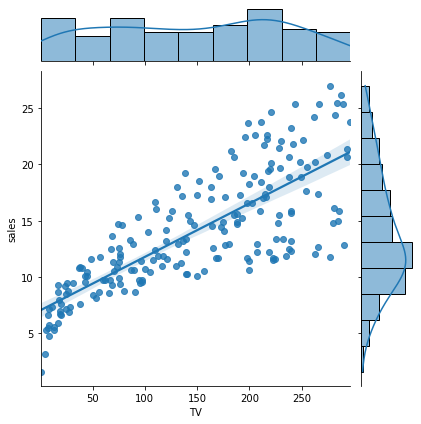

In [21]:
sns.jointplot(x="TV", y="sales", data=df,kind="reg")

# Statsmodels ile modelleme

In [23]:
import statsmodels.api as sm

In [22]:
X=df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [24]:
X=sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [25]:
Y=df["sales"]
Y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [26]:
lm=sm.OLS(Y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        16:54:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
import statsmodels.formula.api as smf
lm=smf.ols("sales ~ TV",df)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        17:05:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [29]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [30]:
model.conf_int() #confidence interval

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [31]:
model.f_pvalue

1.4673897001947095e-42

In [32]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [34]:
Y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [35]:
# modelin yazımı
print("Sales=",model.params[0], "+ TV*",model.params[1])

Sales= 7.032593549127695 + TV* 0.04753664043301977


# Sckit Learn ile Model Oluşturma

In [36]:
from sklearn.linear_model import LinearRegression

In [45]:
X=df[["TV"]]
Y=df[["sales"]]
reg=LinearRegression()
model=reg.fit(X,Y)
model.intercept_
model.coef_

array([[0.04753664]])

In [39]:
model.score(X,Y) #R2 değeri

0.611875050850071

In [40]:
model.predict(X)[0:10] #tahmin edilen X değerleri

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

## Tahmin Modeli için 1.Yöntem
tahmin fonksiyonunu kendimiz yazdığımız tahmin modeli


In [43]:
spend=int(input("TV reklamları için ne kadar harcandı?"))
revenue=model.intercept_ + spend * model.coef_
print("{} birim TV reklamları harcaması ile tahmini elde edeceğiniz satış geliri:{}".format(spend,revenue))

TV reklamları için ne kadar harcandı?10
10 birim TV reklamları harcaması ile tahmini elde edeceğiniz satış geliri:[[7.50795995]]


## Tahmin Modeli için 2.Yöntem
model.predict() fonksiyonu yardımı ile tahmin modeli


In [47]:
spend=int(input("TV reklamları için ne kadar harcandı?"))
predict=model.predict([[spend]])
print("{} birim TV reklamları harcaması ile tahmini elde edeceğiniz satış geliri:{}".format(spend,predict))

TV reklamları için ne kadar harcandı?10
10 birim TV reklamları harcaması ile tahmini elde edeceğiniz satış geliri:[[7.50795995]]


# Artıklar Ve Makine Öğrenmesindeki Önemi

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [49]:
lm=smf.ols("sales ~ TV",df)
model=lm.fit()

In [51]:
mse=mean_squared_error(Y,model.fittedvalues)
mse

10.512652915656759

In [86]:
X = df[["TV"]]
Y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, Y)

In [92]:
k_t = pd.DataFrame({"gercek_y": Y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})
k_t


,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [98]:
k_t["e"]=k_t['gercek_y']-k_t['tahmin_y']
k_t

,gercek_y,tahmin_y,hatalar,e
0,22.1,17.970775,4.129225,4.129225
1,10.4,9.147974,1.252026,1.252026
2,9.3,7.850224,1.449776,1.449776
3,18.5,14.234395,4.265605,4.265605
4,12.9,15.627218,-2.727218,-2.727218
5,7.2,7.446162,-0.246162,-0.246162
6,11.8,9.765950,2.034050,2.034050
7,13.2,12.746498,0.453502,0.453502
8,4.8,7.441409,-2.641409,-2.641409
9,10.6,16.530414,-5.930414,-5.930414


In [100]:
k_t["e^2"]=k_t["e"]**2
k_t

,gercek_y,tahmin_y,hatalar,e,e^2
0,22.1,17.970775,4.129225,4.129225,17.050503
1,10.4,9.147974,1.252026,1.252026,1.567569
2,9.3,7.850224,1.449776,1.449776,2.101851
3,18.5,14.234395,4.265605,4.265605,18.195390
4,12.9,15.627218,-2.727218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,-0.246162,0.060596
6,11.8,9.765950,2.034050,2.034050,4.137358
7,13.2,12.746498,0.453502,0.453502,0.205664
8,4.8,7.441409,-2.641409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,-5.930414,35.169814


In [103]:
np.sum(k_t["e^2"])

92.90350329638103

In [104]:
np.mean(k_t["e^2"])

9.290350329638105

In [105]:
np.sqrt(np.sum(k_t["e^2"]))

9.63864634149324